<a href="https://colab.research.google.com/github/KianaLaBella/co2emissions/blob/main/Kiana%20LaBella%20MATH%202315%20Lab%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns 

sns.set_style("whitegrid")

import missingno as msno

## Lab introduction

I will be using the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO$_2$ emitters have changed over the last 50 years (1971 - 2020). I will first look at the data as a whole, then analyze it to understand the trends of the top 10 CO$_2$ emitters during this time period.



## Import and set up the data set

In [ ]:
emitters = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

This [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) contains the description of each column.

The `country` column of the data set contains some values that are groups of countries. I will remove these observations from the data set by first defining the non-countries (non_countries) and removing them using the code below.

In [ ]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

In [ ]:
emitters = emitters.loc[emitters['country'].isin(non_countries) == False]

## Explore the data set

In [ ]:
emitters.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


####Gaps in the Data

In [ ]:
emitters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

In [ ]:
emitters.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

Every continuous number should be given by float64. It seems as though the info is following this rule. Because the country and ISO Code are not continuous variables, but word/letters, they should be given as object. This is also reflected in the data. Finally, the year is given by int64 because it is not continuous. Therefore, the variables are all correctly listed.

On the other hand, every Non-Null variable that is less than the max amount of variables (46523) is recorded incorrectly. For example, the iso_code is incorrect because 39862 is less than 46523. To more easily identify missing values, the sum code above shows the total number of missing variables in each column. Therefore, we are missing variables for these columns. 

####Year Range

In [ ]:
emitters['year']

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

The years range from 1850 to 2021.

## Analysis of top emissions in 2020

The top 10 emitters of total CO$_2$ in 2020:



In [ ]:
emitters[emitters['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


To better visualize the total CO$_2$ emissions from all countries in 2020, I plotted them on a histograph. This way, I have a basic understanding of the amount of CO$_2$ emissions being released.

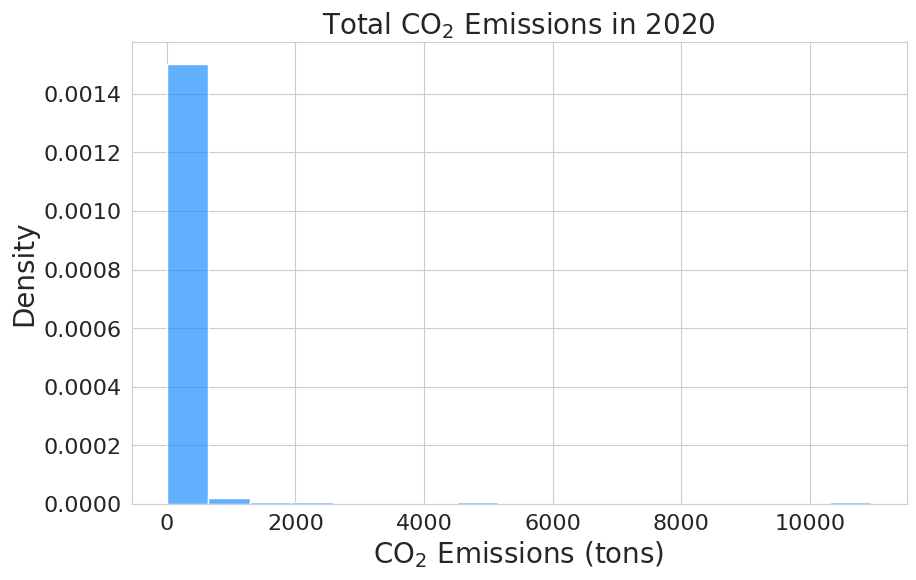

In [ ]:
#Histograph Plot 
plt.figure(figsize = (10,6))

sns.histplot(data = emitters[emitters['year'] == 2020], x = 'co2', bins = 17, color = 'dodgerblue', alpha = 0.7, stat = 'density')

plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO$_2$ Emissions (tons)',fontsize = 20)
plt.title('Total CO$_2$ Emissions in 2020', fontsize = 20)

plt.tick_params(labelsize = 16);

From the graph, it is clear to see that the CO$_2$ emissions from most countries range from 0 to about 500 tons. The smallest bars on the graph, while difficult to see, are where the highest CO$_2$ emitters lie. For example, though very small, there is still a bar around the 10000 tons line. This is presumably China, as they have the highest amount of CO$_2$ emissions in comparison to all other countries.  

To better view how the outliers affect the data, it would be more beneficial to analyze the data using a bar graph: 

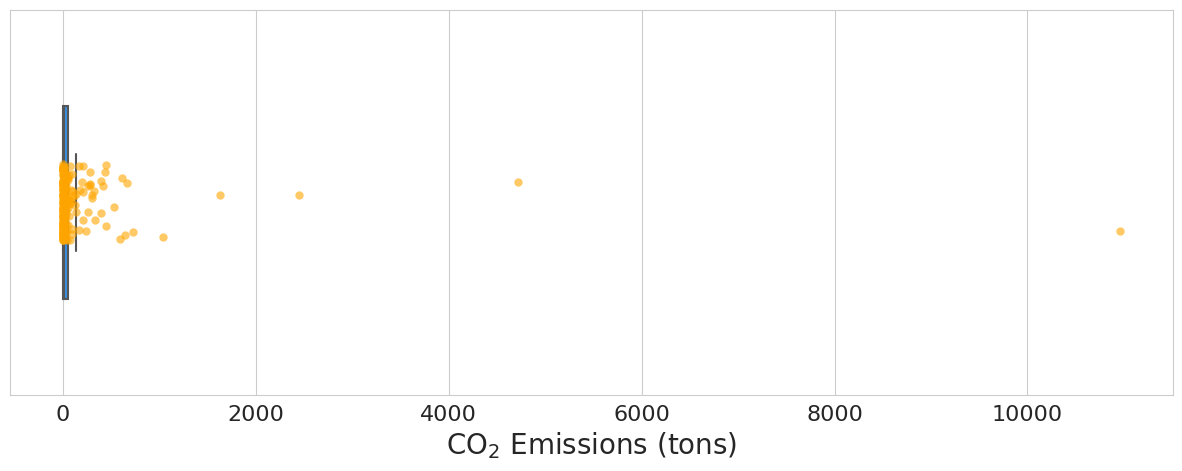

In [ ]:
#Bar Graph Plot
plt.figure(figsize = (15,5))

sns.boxplot(data = emitters[emitters['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

sns.stripplot(data = emitters[emitters['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

plt.xlabel('CO$_2$ Emissions (tons)', fontsize = 20)

plt.tick_params(labelsize = 16);

When reviewing the bar graph, it is clear to see that anything beyond  1000 tons is an outlier. By this definition, some of the top 10 CO$_2$ emitters in 2020 are stong outliers in the total distribution. China is most notably skewing the data. Because of its extremely large value of CO$_2$ emissions, the data of the other countries look small in comparison. The results of the histograph make more sense when viewing from this bar graph perspective. Like the histograph, the bar graph shows most countries emitting around 0-500 tons of CO$_2$. Unlike the histograph, however, the top 10 emitters are much more visible on the bar graph, more effectively revealing their effect on the data as a whole.

## Emission trend over time (1971-2020)

I will now be analyzing the data from 1971-2020. In order to ensure the accuracy of the data, I will be checking for missing variables in the top 10 emitters' data in 2020:

In [ ]:
emitters[emitters['year'] == 2020].sort_values(by = 'co2', ascending = False).head(10).isna()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
44221,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20136,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
35053,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
21756,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20552,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
36664,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
16794,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
20308,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
39259,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


Every True value signifies a missing variable in the data. When looking only at the general CO$_2$ emissions (given by co2), it is clear to see that there are no missing values for the top 10 emitters in 2020. 

In order to visualize the data from above, I will plot the values of the top 10 emitters from 1971-2020 on a time plot:

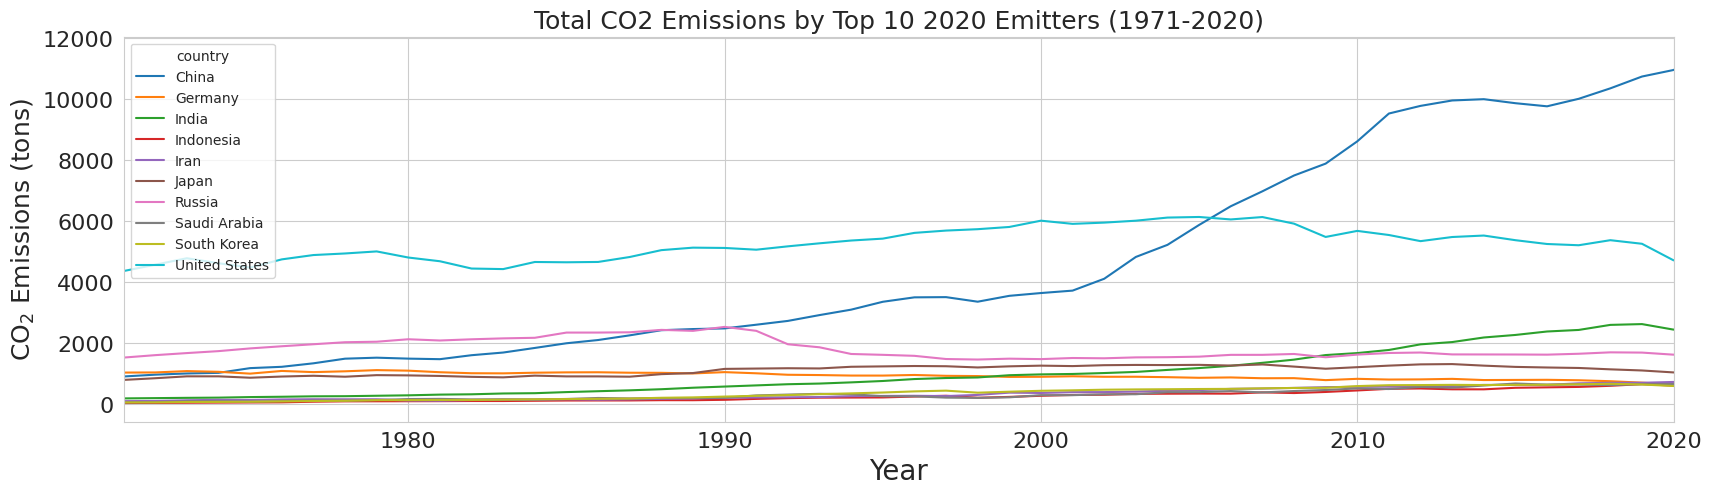

In [ ]:
#Time Plot Graph - Top 10 Emitters
plt.figure(figsize=(20,5))
sns.lineplot(data=emitters[emitters['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.title('Total CO2 Emissions by Top 10 2020 Emitters (1971-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);

This graph provides a clear depiction of how the CO$_2$ emissions from the top 10 emitters changed over time. As of recently (around 2020), it seems as though most countries are attempting to reduce their overall CO$_2$ emissions, as their lines are starting to decrease around then. 

It is important to note that this data only shows the CO$_2$ emissions from the top emitters in the world. To compare their high emissions to the rest of the world, I will attach a plot to the graph that measures the average CO$_2$ emissions from all countries. The resulting line is provided in black:

<ipython-input-32-01436c9496f0>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = emitters.groupby('year').mean(),


<Axes: title={'center': 'Total CO$_2$ Emissions by Top 10 2020 Emitters (1971-2020)'}, xlabel='Year', ylabel='CO$_2$ Emissions (tons)'>

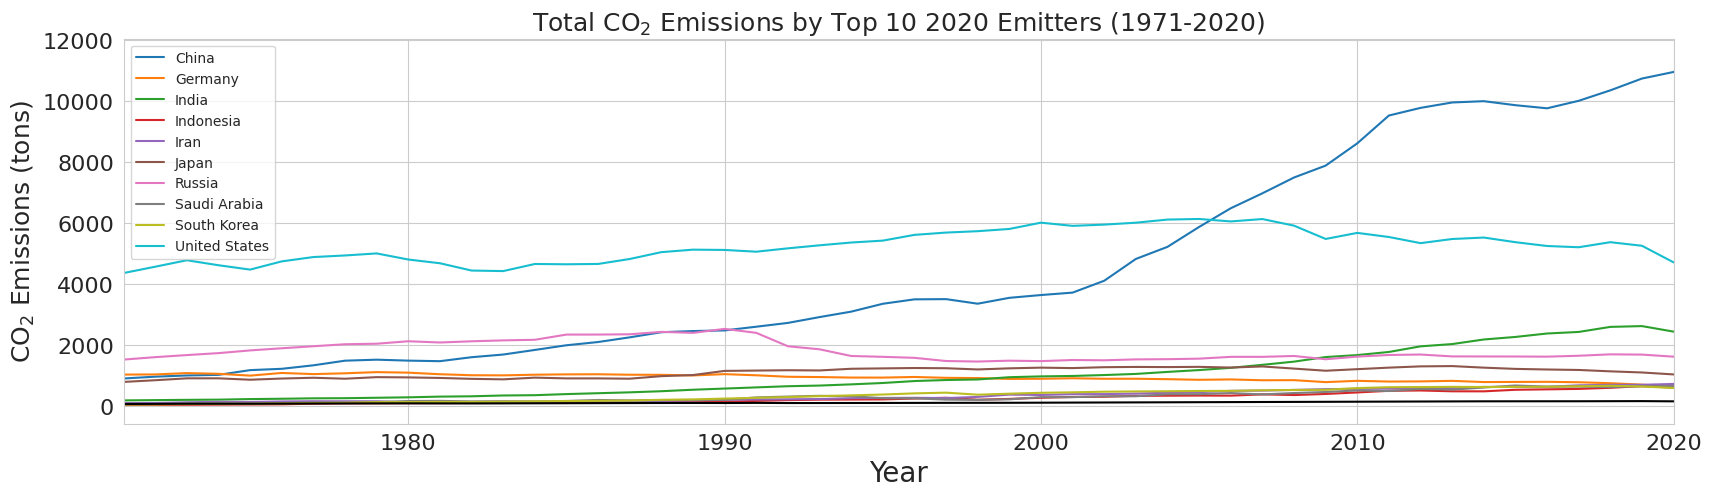

In [ ]:
#Time Plot Graph - Top 10 Emitters
plt.figure(figsize=(20,5))
sns.lineplot(data=emitters[emitters['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.title('Total CO$_2$ Emissions by Top 10 2020 Emitters (1971-2020)', fontsize = 18)

plt.tick_params(labelsize = 16);

#Additional Mean Plot - Average Total Emissions
sns.lineplot(data = emitters.groupby('year').mean(),
             x = 'year',
             y = 'co2',
             color = 'k')

The black line shows the average CO$_2$ emissions from all countries. Its extremely low placement on the graph reveals how large the amount of low-CO$_2$ emission countries are. In fact, it is so low that the top 10 CO$_2$ emitters are generally emitting higher amounts of CO$_2$ than the average of all other countries combined throughout the graph. Alternatively, the average remains fairly constant throughout this 50-year period, suggesting that no significant changes have been made to decrease the copious amount of CO$_2$ being released into the atmosphere. 

In order to analyze the difference between the top 10 emitters and the average CO$_2$ emissions from all countries more closely, I will plot the previous information on a log scale:

<ipython-input-30-dd505c4589fe>:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = emitters.groupby('year').mean(),


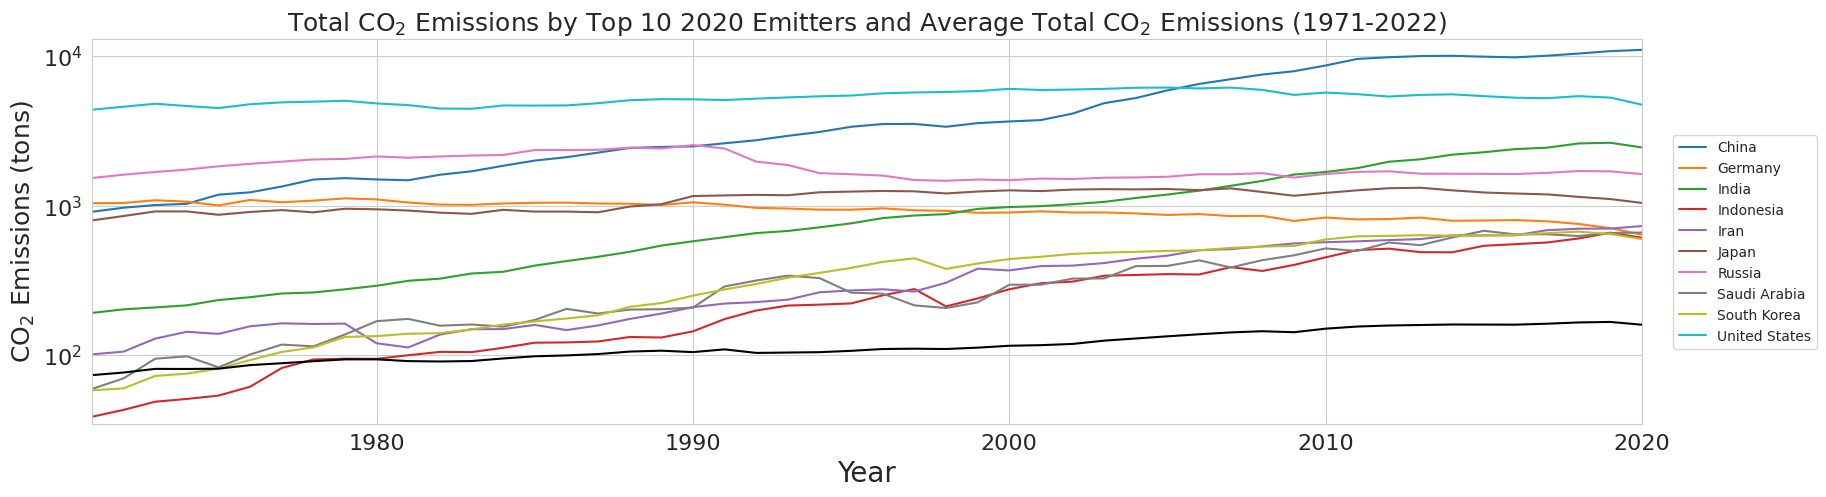

In [ ]:
#Time Plot Graph - Top 10 Emitters and Average Total Emissions
plt.figure(figsize=(20,5))
sns.lineplot(data=emitters[emitters['country'].isin(['China','United States','Russia','India','Japan','Iran','Saudi Arabia','Germany','Indonesia','South Korea'])], 
             x='year', 
             y='co2', 
             hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO$_2$ Emissions (tons)', fontsize = 18)
plt.xlim(1971,2020)
plt.ylim((35,13000))
plt.title('Total CO$_2$ Emissions by Top 10 2020 Emitters and Average Total CO$_2$ Emissions (1971-2022)', fontsize = 18)

plt.tick_params(labelsize = 16);

sns.lineplot(data = emitters.groupby('year').mean(),
             x = 'year',
             y = 'co2',
             color = 'k')

#Plot on Log Graph
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)

The most obvious trend shown in the above graph is the increase of the top 10 CO$_2$ emitters' - and the average CO$_2$ emissions from every country's -  emissions over the 50 year time period. This could likely be a result of increased population sizes and/or industry advancements. Generally, the CO$_2$ emissions from  United States, Germany, and Japan, in addition to the average total emissions, seem to show no significant signs of improvement nor deterioration. On the other hand, all other coutries, except for Russia, have increased their CO$_2$ emissions during this period. Russia decreased their CO$_2$ emissions around the early 1990s (presumably between 1990 and 1995), yet remained relatively steady in their emissions since. 

It is important to note that, as stated earlier, the current CO$_2$ emissions from most countries have begun its descent around 2019-2020. While it is too early to determine whether this decrease remains consistent today, this is a promising sign of hopefully reducing the average amount of CO$_2$ emissions overall. The only two countries that show no signs of decreasing their CO$_2$ emissions as of 2019-2020 are Iran and China.

In comparison to the highest CO$_2$ emissions plotted on the graph (China), the average of all countries combined seems fairly low. This is caused by the large amount of countries emitting low amounts of CO$_2$ in comparison to the high-CO$_2$ emitters, like those in the top 10. Consequently, when only looking at the average emission line, there seems to be no significant change, signifying no need for immediate action. However, when placing it on graphs with the highest emitters, it is clear to see how the top 10 emitters affect the average. It would be much lower if they actively worked on reducing these emissions and bringing the average down.